In [1]:
# -----------------------------
# Cell 1: Setup paths
# -----------------------------
import sys
from pathlib import Path

# Notebook location
notebook_path = Path().resolve()  # current notebook folder
project_root = notebook_path.parent.parent  # Notebook/ -> project root
src_path = project_root / "src"


# Current notebook folder
notebook_path = Path().resolve()



# Add to Python path
sys.path.insert(0, str(src_path))
sys.path.insert(0, str(project_root))

print("Notebook path:", notebook_path)
print("Project root:", project_root)
print("SRC path:", src_path)

Notebook path: D:\10Acadamy\Week 2\Tasks\Fintech-App-Customer-Experience-Analytics\notebooks\exploration
Project root: D:\10Acadamy\Week 2\Tasks\Fintech-App-Customer-Experience-Analytics
SRC path: D:\10Acadamy\Week 2\Tasks\Fintech-App-Customer-Experience-Analytics\src


In [13]:
# 1️⃣ Setup Environment
from pathlib import Path
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns



from fintech_app_reviews.config import load_config
from fintech_app_reviews.scraper.google_play_scraper import scrape_app_reviews
from fintech_app_reviews.preprocessing.cleaner import clean_reviews
from fintech_app_reviews.preprocessing.date_normalizer import normalize_date
from fintech_app_reviews.preprocessing.lang_filter import is_strict_english

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - [SCRAPE] - %(message)s"
)
logger = logging.getLogger("SCRAPE")



In [3]:

# Config path at project root
config_path = project_root / "configs" / "scraper.yaml"

config = load_config(config_path)

print("Config path:", config_path)
print("Apps in config:", config.get("scraper", {}).get("app_ids", []))

Config path: D:\10Acadamy\Week 2\Tasks\Fintech-App-Customer-Experience-Analytics\configs\scraper.yaml
Apps in config: ['com.combanketh.mobilebanking', 'com.boa.boaMobileBanking', 'com.dashen.dashensuperapp']


In [4]:


# Derive config path relative to project root
config_path = project_root / "configs" / "scraper.yaml"
config = load_config(config_path)

if not config:
    print(f"Failed to load config from {config_path}")
else:
    print("Config loaded successfully")
    
scraper_config = config.get("scraper", {})
output_config = config.get("output", {})
bank_mapping = config.get("bank_mapping", {})

app_ids = scraper_config.get("app_ids", [])
max_reviews = int(scraper_config.get("max_reviews"))
sort_by = scraper_config.get("sort_by", "newest")
batch_size = scraper_config.get("batch_size")

logger.info(f"Loaded config for apps: {app_ids}")

2025-11-30 23:23:00,523 - INFO - [SCRAPE] - Loaded config for apps: ['com.combanketh.mobilebanking', 'com.boa.boaMobileBanking', 'com.dashen.dashensuperapp']


Config loaded successfully


In [5]:
# 3️⃣ Scrape Reviews for Each App
all_reviews = []

for app_id in app_ids:
    bank_name = bank_mapping.get(app_id, "Unknown Bank")
    logger.info(f"Scraping reviews for {bank_name} ({app_id})")

    reviews = scrape_app_reviews(
        app_id=app_id,
        app_id_to_bank=bank_mapping,
        max_reviews=600,
        sort_by=sort_by
    )

    logger.info(f"Collected {len(reviews)} reviews for {bank_name}")
    all_reviews.extend(reviews)

2025-11-30 23:23:00,564 - INFO - [SCRAPE] - Scraping reviews for Commercial Bank of Ethiopia (CBE) (com.combanketh.mobilebanking)
2025-11-30 23:23:00,567 - INFO - [SCRAPE] - Scraping reviews for Commercial Bank of Ethiopia (CBE) (com.combanketh.mobilebanking). Max reviews: 600
2025-11-30 23:23:04,235 - INFO - [SCRAPE] - Finished scraping Commercial Bank of Ethiopia (CBE). Total reviews collected: 600
2025-11-30 23:23:04,238 - INFO - [SCRAPE] - Collected 600 reviews for Commercial Bank of Ethiopia (CBE)
2025-11-30 23:23:04,240 - INFO - [SCRAPE] - Scraping reviews for Bank of Abyssinia (BOA) (com.boa.boaMobileBanking)
2025-11-30 23:23:04,242 - INFO - [SCRAPE] - Scraping reviews for Bank of Abyssinia (BOA) (com.boa.boaMobileBanking). Max reviews: 600
2025-11-30 23:23:06,968 - INFO - [SCRAPE] - Finished scraping Bank of Abyssinia (BOA). Total reviews collected: 600
2025-11-30 23:23:06,973 - INFO - [SCRAPE] - Collected 600 reviews for Bank of Abyssinia (BOA)
2025-11-30 23:23:06,980 - INFO -

In [6]:
# 4️⃣ Convert to DataFrame & Inspect
df = pd.DataFrame(all_reviews)
logger.info(f"Total reviews collected: {len(df)}")
df.head()

2025-11-30 23:23:09,829 - INFO - [SCRAPE] - Total reviews collected: 1800


,review_id,review_text,rating,review_date,user_name,thumbs_up_count,bank,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29T17:22:32,Kamil Tesfaye,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29T15:54:14,Abde Semed,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29T08:17:45,TOMIZ Creativity,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28T13:36:32,Tesfaye Abdi,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28T11:33:17,Betelhem Kebede,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play


In [7]:
# 5️⃣ Clean & Deduplicate Reviews
df_cleaned = clean_reviews(df)
logger.info(f"Total cleaned reviews: {len(df_cleaned)}")
df_cleaned.head()

2025-11-30 23:23:10,065 - INFO - [SCRAPE] - Removed 0 duplicate rows based on review_id.
2025-11-30 23:23:10,136 - INFO - [SCRAPE] - Dropped 51 rows with empty/short text.
2025-11-30 23:23:10,153 - INFO - [SCRAPE] - Dropped 0 rows with missing or invalid ratings.
2025-11-30 23:23:10,157 - INFO - [SCRAPE] - Total cleaned reviews: 1749


,review_id,review,rating,review_date,user_name,thumbs_up_count,bank,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,cbe ይለያል።,5,2025-11-29T17:22:32,Kamil Tesfaye,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29T15:54:14,Abde Semed,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,make it user friendly.,2,2025-11-29T08:17:45,TOMIZ Creativity,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28T13:36:32,Tesfaye Abdi,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28T11:33:17,Betelhem Kebede,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play


In [8]:
df_cleaned["is_english"] = df_cleaned["review"].apply(is_strict_english)
df_cleaned = df_cleaned[df_cleaned["is_english"]].drop(columns=["is_english"])

In [9]:
# Parse ISO timestamp → datetime
df_cleaned["date"] = pd.to_datetime(
    df_cleaned["review_date"],
    errors="coerce"
)

# Drop anything invalid
df_cleaned = df_cleaned.dropna(subset=["date"]).copy()

# If timestamp has timezone, strip it
if df_cleaned["date"].dt.tz is not None:
    df_cleaned["date"] = df_cleaned["date"].dt.tz_convert(None)

# Convert datetime → pure date (YYYY-MM-DD)
df_cleaned["date"] = df_cleaned["date"].dt.strftime("%Y-%m-%d")

df_cleaned.head()

,review_id,review,rating,review_date,user_name,thumbs_up_count,bank,app_id,source,date
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29T15:54:14,Abde Semed,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play,2025-11-29
5,5112423d-e618-44ba-ba49-62677cb76cd6,this application is very important and advanta...,5,2025-11-27T23:08:20,Gurawaa Dooguu,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play,2025-11-27
6,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27T22:40:35,Yohannesb Adugna,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play,2025-11-27
7,c69f051a-00f8-4144-8423-b7ebcd328d2d,the app makes our life easier. thank you cbe!,5,2025-11-27T18:00:06,Mohammed Abrahim,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play,2025-11-27
9,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27T10:03:41,Sayid Ahmad,0,Commercial Bank of Ethiopia (CBE),com.combanketh.mobilebanking,google_play,2025-11-27


In [10]:
# Finalize DataFrame with Required Columns
FINAL_COLUMNS = ["review", "rating", "date", "bank", "source"]
present_final_cols = [c for c in FINAL_COLUMNS if c in df_cleaned.columns]
df_final = df_cleaned[present_final_cols].copy()
df_final.reset_index(drop=True, inplace=True)

# Check missing data percentage
total_cells = df_final.size
missing_cells = df_final.isnull().sum().sum()
missing_pct = (missing_cells / total_cells) * 100 if total_cells > 0 else 0
logger.info(f"Missing data: {missing_pct:.2f}%")
df_final.head()

2025-11-30 23:23:33,202 - INFO - [SCRAPE] - Missing data: 0.00%


,review,rating,date,bank,source
0,it's special for me,5,2025-11-29,Commercial Bank of Ethiopia (CBE),google_play
1,this application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia (CBE),google_play
2,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia (CBE),google_play
3,the app makes our life easier. thank you cbe!,5,2025-11-27,Commercial Bank of Ethiopia (CBE),google_play
4,the most advanced app. but how to stay safe?,5,2025-11-27,Commercial Bank of Ethiopia (CBE),google_play


2025-11-30 23:23:59,128 - INFO - [SCRAPE] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-30 23:23:59,154 - INFO - [SCRAPE] - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


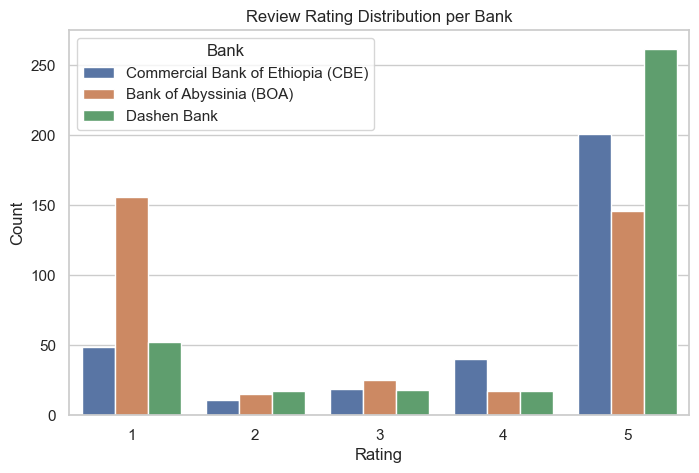

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='rating', hue='bank')
plt.title("Review Rating Distribution per Bank")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Bank")
plt.show()

In [12]:
# Output config
raw_dir = project_root / output_config.get("raw_path", "data/raw")
raw_dir.mkdir(parents=True, exist_ok=True)
raw_csv = raw_dir / "raw_reviews.csv"
df.to_csv(raw_csv, index=False)
logger.info(f"Raw CSV saved: {raw_csv.resolve()}")

interim_dir = project_root / output_config.get("interim_path", "data/interim")
interim_dir.mkdir(parents=True, exist_ok=True)
interim_csv = interim_dir / "interim_reviews.csv"
df_final.to_csv(interim_csv, index=False)
logger.info(f"Interim CSV saved: {interim_csv.resolve()}")

2025-11-30 23:23:59,808 - INFO - [SCRAPE] - Raw CSV saved: D:\10Acadamy\Week 2\Tasks\Fintech-App-Customer-Experience-Analytics\data\raw\raw_reviews.csv
2025-11-30 23:23:59,820 - INFO - [SCRAPE] - Interim CSV saved: D:\10Acadamy\Week 2\Tasks\Fintech-App-Customer-Experience-Analytics\data\interim\interim_reviews.csv
